# **ASSIGNMENT** **1**   (**ADS**)   

In [ ]:
import numpy as  np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
from scipy import stats
from sklearn import metrics
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error


# ***LOADING***  ***DATASET***

In [ ]:
from google.colab import files
df=files.upload()

Saving House.csv to House (1).csv


In [ ]:
df=pd.read_csv("House.csv")
df

,id,Date,number of bedrooms,number of bathrooms,living area,lot area,number of floors,waterfront present,number of views,condition of the house,...,Built Year,Renovation Year,Postal Code,Lattitude,Longitude,living_area_renov,lot_area_renov,Number of schools nearby,Distance from the airport,Price
0,6762810145,42491,5,2.50,3650,9050,2.0,0,4,5,...,1921,0,122003,52.8645,-114.557,2880,5400,2,58,2380000
1,6762810635,42491,4,2.50,2920,4000,1.5,0,0,5,...,1909,0,122004,52.8878,-114.470,2470,4000,2,51,1400000
2,6762810998,42491,5,2.75,2910,9480,1.5,0,0,3,...,1939,0,122004,52.8852,-114.468,2940,6600,1,53,1200000
3,6762812605,42491,4,2.50,3310,42998,2.0,0,0,3,...,2001,0,122005,52.9532,-114.321,3350,42847,3,76,838000
4,6762812919,42491,3,2.00,2710,4500,1.5,0,0,4,...,1929,0,122006,52.9047,-114.485,2060,4500,1,51,805000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14615,6762830250,42734,2,1.50,1556,20000,1.0,0,0,4,...,1957,0,122066,52.6191,-114.472,2250,17286,3,76,221700
14616,6762830339,42734,3,2.00,1680,7000,1.5,0,0,4,...,1968,0,122072,52.5075,-114.393,1540,7480,3,59,219200
14617,6762830618,42734,2,1.00,1070,6120,1.0,0,0,3,...,1962,0,122056,52.7289,-114.507,1130,6120,2,64,209000
14618,6762830709,42734,4,1.00,1030,6621,1.0,0,0,4,...,1955,0,122042,52.7157,-114.411,1420,6631,3,54,205000


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14620 entries, 0 to 14619
Data columns (total 23 columns):
 #   Column                                 Non-Null Count  Dtype  
---  ------                                 --------------  -----  
 0   id                                     14620 non-null  int64  
 1   Date                                   14620 non-null  int64  
 2   number of bedrooms                     14620 non-null  int64  
 3   number of bathrooms                    14620 non-null  float64
 4   living area                            14620 non-null  int64  
 5   lot area                               14620 non-null  int64  
 6   number of floors                       14620 non-null  float64
 7   waterfront present                     14620 non-null  int64  
 8   number of views                        14620 non-null  int64  
 9   condition of the house                 14620 non-null  int64  
 10  grade of the house                     14620 non-null  int64  
 11  Ar

In [ ]:
df.shape

(14620, 23)

In [ ]:
df.dtypes

id                                         int64
Date                                       int64
number of bedrooms                         int64
number of bathrooms                      float64
living area                                int64
lot area                                   int64
number of floors                         float64
waterfront present                         int64
number of views                            int64
condition of the house                     int64
grade of the house                         int64
Area of the house(excluding basement)      int64
Area of the basement                       int64
Built Year                                 int64
Renovation Year                            int64
Postal Code                                int64
Lattitude                                float64
Longitude                                float64
living_area_renov                          int64
lot_area_renov                             int64
Number of schools ne

# *** VISUALIUZATION***

## ***  UNIVARIATE ANALYSIS***

In [ ]:
df.describe()

,id,Date,number of bedrooms,number of bathrooms,living area,lot area,number of floors,waterfront present,number of views,condition of the house,...,Built Year,Renovation Year,Postal Code,Lattitude,Longitude,living_area_renov,lot_area_renov,Number of schools nearby,Distance from the airport,Price
count,1.462000e+04,14620.000000,14620.000000,14620.000000,14620.000000,1.462000e+04,14620.000000,14620.000000,14620.000000,14620.000000,...,14620.000000,14620.000000,14620.000000,14620.000000,14620.000000,14620.000000,14620.000000,14620.000000,14620.000000,1.462000e+04
mean,6.762821e+09,42604.538646,3.379343,2.129583,2098.262996,1.509328e+04,1.502360,0.007661,0.233105,3.430506,...,1970.926402,90.924008,122033.062244,52.792848,-114.404007,1996.702257,12753.500068,2.012244,64.950958,5.389322e+05
std,6.237575e+03,67.347991,0.938719,0.769934,928.275721,3.791962e+04,0.540239,0.087193,0.766259,0.664151,...,29.493625,416.216661,19.082418,0.137522,0.141326,691.093366,26058.414467,0.817284,8.936008,3.675324e+05
min,6.762810e+09,42491.000000,1.000000,0.500000,370.000000,5.200000e+02,1.000000,0.000000,0.000000,1.000000,...,1900.000000,0.000000,122003.000000,52.385900,-114.709000,460.000000,651.000000,1.000000,50.000000,7.800000e+04
25%,6.762815e+09,42546.000000,3.000000,1.750000,1440.000000,5.010750e+03,1.000000,0.000000,0.000000,3.000000,...,1951.000000,0.000000,122017.000000,52.707600,-114.519000,1490.000000,5097.750000,1.000000,57.000000,3.200000e+05
50%,6.762821e+09,42600.000000,3.000000,2.250000,1930.000000,7.620000e+03,1.500000,0.000000,0.000000,3.000000,...,1975.000000,0.000000,122032.000000,52.806400,-114.421000,1850.000000,7620.000000,2.000000,65.000000,4.500000e+05
75%,6.762826e+09,42662.000000,4.000000,2.500000,2570.000000,1.080000e+04,2.000000,0.000000,0.000000,4.000000,...,1997.000000,0.000000,122048.000000,52.908900,-114.315000,2380.000000,10125.000000,3.000000,73.000000,6.450000e+05
max,6.762832e+09,42734.000000,33.000000,8.000000,13540.000000,1.074218e+06,3.500000,1.000000,4.000000,5.000000,...,2015.000000,2015.000000,122072.000000,53.007600,-113.505000,6110.000000,560617.000000,3.000000,80.000000,7.700000e+06


***HISTOGRAM***

<Axes: xlabel='Date', ylabel='Count'>

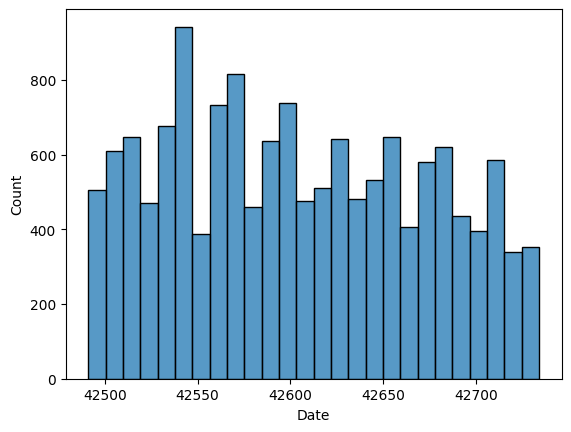

In [ ]:
sns.histplot(x='Date', data=df)

***BOXPLOT***

<Axes: >

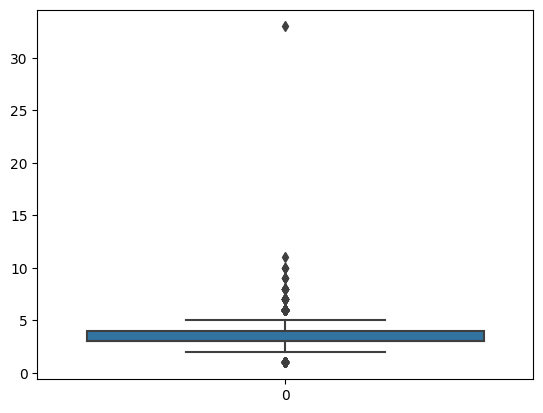

In [ ]:
 sns.boxplot(df['number of bedrooms'])


<Axes: >

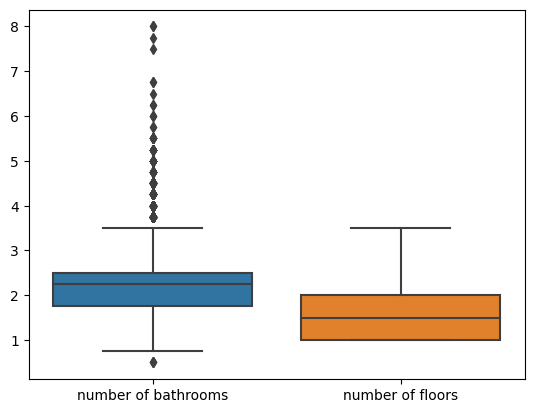

In [ ]:
sns.boxplot(data=df.loc[:, ['number of bathrooms', 'number of floors']])

<Axes: >

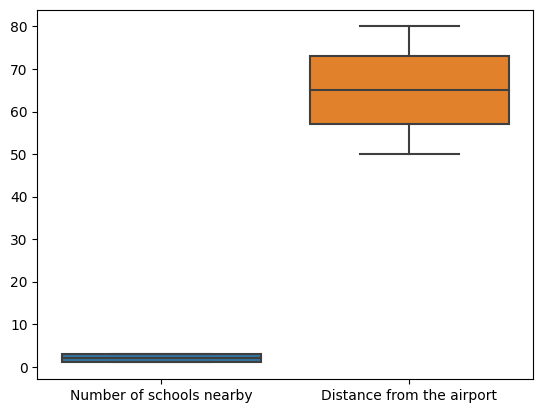

In [ ]:
sns.boxplot(data=df.loc[:, ['Number of schools nearby', 'Distance from the airport']])

***VIOLIN PLOT***

<Axes: xlabel='living area'>

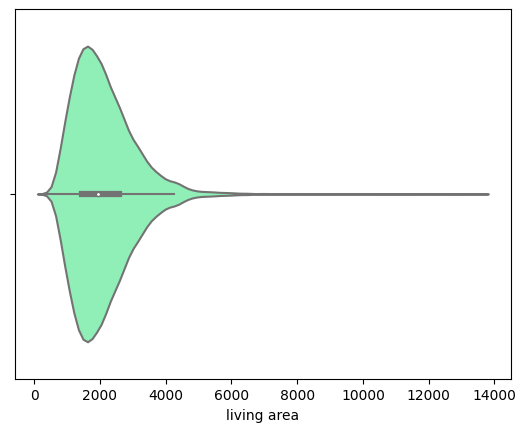

In [ ]:
sns.violinplot(x=df["living area"],palette='rainbow')

***STRIP PLOTS***

<Axes: xlabel='lot area'>

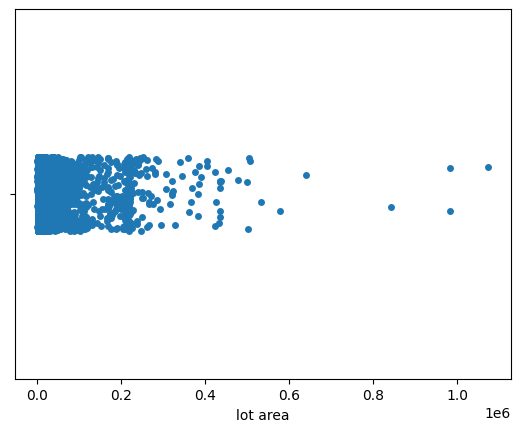

In [ ]:
sns.stripplot(x=df["lot area"])

## *** BIVARIATE ANALYSIS***

 ***CORRELATION*** ***COEFFICIENTS***   

In [ ]:
 df.corr()

,id,Date,number of bedrooms,number of bathrooms,living area,lot area,number of floors,waterfront present,number of views,condition of the house,...,Built Year,Renovation Year,Postal Code,Lattitude,Longitude,living_area_renov,lot_area_renov,Number of schools nearby,Distance from the airport,Price
id,1.000000,0.045966,-0.329034,-0.516909,-0.648127,-0.100269,-0.312305,-0.112937,-0.293004,-0.045061,...,-0.068645,-0.109155,0.294709,-0.479334,-0.070841,-0.599900,-0.089604,-0.004821,-0.004542,-0.773114
Date,0.045966,1.000000,-0.015663,-0.026485,-0.021958,0.004392,-0.010335,0.012006,-0.004782,-0.027402,...,-0.005869,-0.011636,0.018243,-0.023327,-0.018231,-0.032495,-0.000050,-0.004071,0.011457,-0.027919
number of bedrooms,-0.329034,-0.015663,1.000000,0.509784,0.570526,0.034416,0.177294,-0.006257,0.078665,0.026597,...,0.152954,0.016132,-0.044156,-0.013163,0.135712,0.389855,0.029400,0.003397,-0.006157,0.308460
number of bathrooms,-0.516909,-0.026485,0.509784,1.000000,0.753517,0.080806,0.502924,0.060104,0.183789,-0.128232,...,0.498127,0.049669,-0.105546,0.031156,0.223904,0.570530,0.078627,0.002180,0.009206,0.531735
living area,-0.648127,-0.021958,0.570526,0.753517,1.000000,0.174420,0.354743,0.105837,0.287728,-0.063358,...,0.309602,0.059400,-0.080303,0.054518,0.240208,0.757571,0.180312,0.002370,0.002511,0.712169
lot area,-0.100269,0.004392,0.034416,0.080806,0.174420,1.000000,-0.004138,0.026282,0.078308,-0.008548,...,0.051615,0.006848,0.070131,-0.090983,0.221432,0.149744,0.706812,-0.012671,0.003291,0.081992
number of floors,-0.312305,-0.010335,0.177294,0.502924,0.354743,-0.004138,1.000000,0.016316,0.020153,-0.269928,...,0.481565,0.006705,-0.129788,0.050731,0.127550,0.285093,-0.010120,-0.007579,0.016567,0.262732
waterfront present,-0.112937,0.012006,-0.006257,0.060104,0.105837,0.026282,0.016316,1.000000,0.400206,0.018644,...,-0.024226,0.085865,0.038318,-0.021795,-0.047791,0.085743,0.032055,0.001563,0.001448,0.263687
number of views,-0.293004,-0.004782,0.078665,0.183789,0.287728,0.078308,0.020153,0.400206,1.000000,0.052533,...,-0.055357,0.102944,0.039268,-0.004555,-0.079706,0.281452,0.072300,0.008004,-0.001657,0.395973
condition of the house,-0.045061,-0.027402,0.026597,-0.128232,-0.063358,-0.008548,-0.269928,0.018644,0.052533,1.000000,...,-0.381718,-0.062126,0.045334,-0.002998,-0.121189,-0.099743,-0.004748,-0.006939,-0.002136,0.041376


***REGRESSION*** ***ANALYSIS***

In [ ]:
X = df.iloc[:, 0].values.reshape(-1, 1)
Y = df.iloc[:, 1].values.reshape(-1, 1)
linear_regressor = LinearRegression()
linear_regressor.fit(X, Y)
Y_pred = linear_regressor.predict(X)

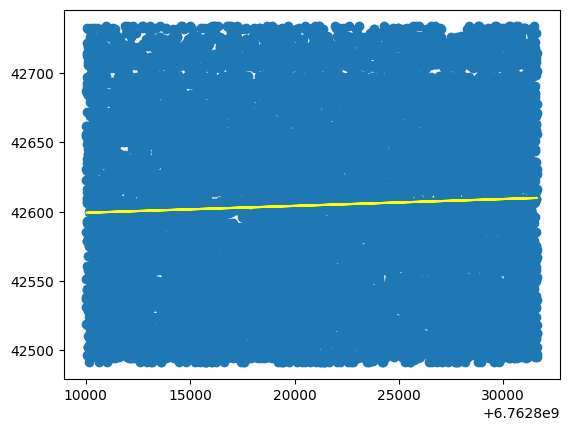

In [ ]:
plt.scatter(X, Y)
plt.plot(X, Y_pred, color='yellow')
plt.show()

***SCATTER*** ***PLOTS***

In [ ]:
df

,id,Date,number of bedrooms,number of bathrooms,living area,lot area,number of floors,waterfront present,number of views,condition of the house,...,Built Year,Renovation Year,Postal Code,Lattitude,Longitude,living_area_renov,lot_area_renov,Number of schools nearby,Distance from the airport,Price
0,6762810145,42491,5,2.50,3650,9050,2.0,0,4,5,...,1921,0,122003,52.8645,-114.557,2880,5400,2,58,2380000
1,6762810635,42491,4,2.50,2920,4000,1.5,0,0,5,...,1909,0,122004,52.8878,-114.470,2470,4000,2,51,1400000
2,6762810998,42491,5,2.75,2910,9480,1.5,0,0,3,...,1939,0,122004,52.8852,-114.468,2940,6600,1,53,1200000
3,6762812605,42491,4,2.50,3310,42998,2.0,0,0,3,...,2001,0,122005,52.9532,-114.321,3350,42847,3,76,838000
4,6762812919,42491,3,2.00,2710,4500,1.5,0,0,4,...,1929,0,122006,52.9047,-114.485,2060,4500,1,51,805000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14615,6762830250,42734,2,1.50,1556,20000,1.0,0,0,4,...,1957,0,122066,52.6191,-114.472,2250,17286,3,76,221700
14616,6762830339,42734,3,2.00,1680,7000,1.5,0,0,4,...,1968,0,122072,52.5075,-114.393,1540,7480,3,59,219200
14617,6762830618,42734,2,1.00,1070,6120,1.0,0,0,3,...,1962,0,122056,52.7289,-114.507,1130,6120,2,64,209000
14618,6762830709,42734,4,1.00,1030,6621,1.0,0,0,4,...,1955,0,122042,52.7157,-114.411,1420,6631,3,54,205000


In [ ]:
data={'number of bedrooms ':[ 5,4,5,4,3,2,3,2,4,3],
      'number of bathrooms':[2.50,2.50,2.75,2.50,2.00,1.50,2.00,1.00,1.00,1.00]}
data

{'number of bedrooms ': [5, 4, 5, 4, 3, 2, 3, 2, 4, 3],
 'number of bathrooms': [2.5, 2.5, 2.75, 2.5, 2.0, 1.5, 2.0, 1.0, 1.0, 1.0]}

<Axes: xlabel='number of bedrooms', ylabel='number of bathrooms'>

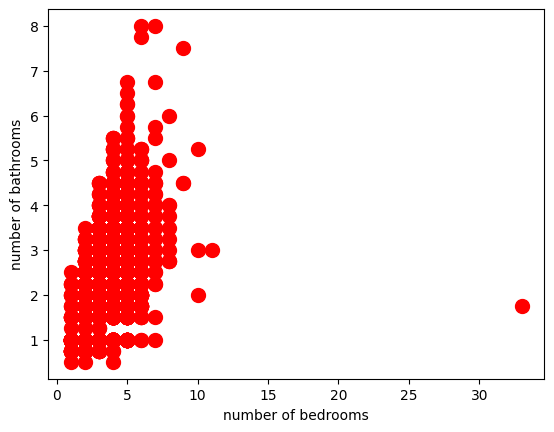

In [ ]:
df.plot.scatter(x = 'number of bedrooms', y = 'number of bathrooms', s = 100,c = 'red')

# ***  MULTIVARIATE*** ***ANALYSIS***

***CLUSTER ANALYSIS***

***COUNT PLOT***

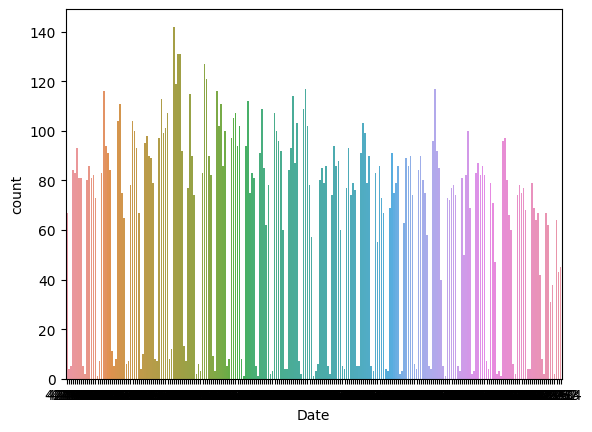

In [ ]:
sns.countplot(x='Date',data=df)
plt.show()

#  *** DESCRIPTIVE STATISTICS ON DATASET***

In [ ]:
df.sum()

id                                       9.887244e+13
Date                                     6.228784e+08
number of bedrooms                       4.940600e+04
number of bathrooms                      3.113450e+04
living area                              3.067660e+07
lot area                                 2.206638e+08
number of floors                         2.196450e+04
waterfront present                       1.120000e+02
number of views                          3.408000e+03
condition of the house                   5.015400e+04
grade of the house                       1.123170e+05
Area of the house(excluding basement)    2.634208e+07
Area of the basement                     4.334524e+06
Built Year                               2.881494e+07
Renovation Year                          1.329309e+06
Postal Code                              1.784123e+09
Lattitude                                7.718314e+05
Longitude                               -1.672587e+06
living_area_renov           

In [ ]:
df.mean()

id                                       6.762821e+09
Date                                     4.260454e+04
number of bedrooms                       3.379343e+00
number of bathrooms                      2.129583e+00
living area                              2.098263e+03
lot area                                 1.509328e+04
number of floors                         1.502360e+00
waterfront present                       7.660739e-03
number of views                          2.331053e-01
condition of the house                   3.430506e+00
grade of the house                       7.682421e+00
Area of the house(excluding basement)    1.801784e+03
Area of the basement                     2.964791e+02
Built Year                               1.970926e+03
Renovation Year                          9.092401e+01
Postal Code                              1.220331e+05
Lattitude                                5.279285e+01
Longitude                               -1.144040e+02
living_area_renov           

In [ ]:
df.std()

id                                         6237.574799
Date                                         67.347991
number of bedrooms                            0.938719
number of bathrooms                           0.769934
living area                                 928.275721
lot area                                  37919.621304
number of floors                              0.540239
waterfront present                            0.087193
number of views                               0.766259
condition of the house                        0.664151
grade of the house                            1.175033
Area of the house(excluding basement)       833.809963
Area of the basement                        448.551409
Built Year                                   29.493625
Renovation Year                             416.216661
Postal Code                                  19.082418
Lattitude                                     0.137522
Longitude                                     0.141326
living_are

In [ ]:
df[0 :11].count()

id                                       11
Date                                     11
number of bedrooms                       11
number of bathrooms                      11
living area                              11
lot area                                 11
number of floors                         11
waterfront present                       11
number of views                          11
condition of the house                   11
grade of the house                       11
Area of the house(excluding basement)    11
Area of the basement                     11
Built Year                               11
Renovation Year                          11
Postal Code                              11
Lattitude                                11
Longitude                                11
living_area_renov                        11
lot_area_renov                           11
Number of schools nearby                 11
Distance from the airport                11
Price                           

In [ ]:
df['Postal Code'].median()

122032.0

In [ ]:
df ["living area" ].max()

13540

In [ ]:
df['Lattitude'].abs()

0        52.8645
1        52.8878
2        52.8852
3        52.9532
4        52.9047
          ...   
14615    52.6191
14616    52.5075
14617    52.7289
14618    52.7157
14619    52.5338
Name: Lattitude, Length: 14620, dtype: float64

In [ ]:
s1 = pd.Series(np.random.randn(10))
s2 = pd.Series(np.random.randn(10))
s1.cov(s2)

-0.35346053635841873

# *** HANDLING MISSING DATA***

In [ ]:
df['Date'].isnull()

0        False
1        False
2        False
3        False
4        False
         ...  
14615    False
14616    False
14617    False
14618    False
14619    False
Name: Date, Length: 14620, dtype: bool

In [ ]:
df.isna()

,id,Date,number of bedrooms,number of bathrooms,living area,lot area,number of floors,waterfront present,number of views,condition of the house,...,Built Year,Renovation Year,Postal Code,Lattitude,Longitude,living_area_renov,lot_area_renov,Number of schools nearby,Distance from the airport,Price
0,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14615,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
14616,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
14617,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
14618,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [ ]:
  df.fillna(0)

,id,Date,number of bedrooms,number of bathrooms,living area,lot area,number of floors,waterfront present,number of views,condition of the house,...,Built Year,Renovation Year,Postal Code,Lattitude,Longitude,living_area_renov,lot_area_renov,Number of schools nearby,Distance from the airport,Price
0,6762810145,42491,5,2.50,3650,9050,2.0,0,4,5,...,1921,0,122003,52.8645,-114.557,2880,5400,2,58,2380000
1,6762810635,42491,4,2.50,2920,4000,1.5,0,0,5,...,1909,0,122004,52.8878,-114.470,2470,4000,2,51,1400000
2,6762810998,42491,5,2.75,2910,9480,1.5,0,0,3,...,1939,0,122004,52.8852,-114.468,2940,6600,1,53,1200000
3,6762812605,42491,4,2.50,3310,42998,2.0,0,0,3,...,2001,0,122005,52.9532,-114.321,3350,42847,3,76,838000
4,6762812919,42491,3,2.00,2710,4500,1.5,0,0,4,...,1929,0,122006,52.9047,-114.485,2060,4500,1,51,805000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14615,6762830250,42734,2,1.50,1556,20000,1.0,0,0,4,...,1957,0,122066,52.6191,-114.472,2250,17286,3,76,221700
14616,6762830339,42734,3,2.00,1680,7000,1.5,0,0,4,...,1968,0,122072,52.5075,-114.393,1540,7480,3,59,219200
14617,6762830618,42734,2,1.00,1070,6120,1.0,0,0,3,...,1962,0,122056,52.7289,-114.507,1130,6120,2,64,209000
14618,6762830709,42734,4,1.00,1030,6621,1.0,0,0,4,...,1955,0,122042,52.7157,-114.411,1420,6631,3,54,205000


In [ ]:
df.dropna()

,id,Date,number of bedrooms,number of bathrooms,living area,lot area,number of floors,waterfront present,number of views,condition of the house,...,Built Year,Renovation Year,Postal Code,Lattitude,Longitude,living_area_renov,lot_area_renov,Number of schools nearby,Distance from the airport,Price
0,6762810145,42491,5,2.50,3650,9050,2.0,0,4,5,...,1921,0,122003,52.8645,-114.557,2880,5400,2,58,2380000
1,6762810635,42491,4,2.50,2920,4000,1.5,0,0,5,...,1909,0,122004,52.8878,-114.470,2470,4000,2,51,1400000
2,6762810998,42491,5,2.75,2910,9480,1.5,0,0,3,...,1939,0,122004,52.8852,-114.468,2940,6600,1,53,1200000
3,6762812605,42491,4,2.50,3310,42998,2.0,0,0,3,...,2001,0,122005,52.9532,-114.321,3350,42847,3,76,838000
4,6762812919,42491,3,2.00,2710,4500,1.5,0,0,4,...,1929,0,122006,52.9047,-114.485,2060,4500,1,51,805000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14615,6762830250,42734,2,1.50,1556,20000,1.0,0,0,4,...,1957,0,122066,52.6191,-114.472,2250,17286,3,76,221700
14616,6762830339,42734,3,2.00,1680,7000,1.5,0,0,4,...,1968,0,122072,52.5075,-114.393,1540,7480,3,59,219200
14617,6762830618,42734,2,1.00,1070,6120,1.0,0,0,3,...,1962,0,122056,52.7289,-114.507,1130,6120,2,64,209000
14618,6762830709,42734,4,1.00,1030,6621,1.0,0,0,4,...,1955,0,122042,52.7157,-114.411,1420,6631,3,54,205000


In [ ]:
df.fillna(method ='bfill')

,id,Date,number of bedrooms,number of bathrooms,living area,lot area,number of floors,waterfront present,number of views,condition of the house,...,Built Year,Renovation Year,Postal Code,Lattitude,Longitude,living_area_renov,lot_area_renov,Number of schools nearby,Distance from the airport,Price
0,6762810145,42491,5,2.50,3650,9050,2.0,0,4,5,...,1921,0,122003,52.8645,-114.557,2880,5400,2,58,2380000
1,6762810635,42491,4,2.50,2920,4000,1.5,0,0,5,...,1909,0,122004,52.8878,-114.470,2470,4000,2,51,1400000
2,6762810998,42491,5,2.75,2910,9480,1.5,0,0,3,...,1939,0,122004,52.8852,-114.468,2940,6600,1,53,1200000
3,6762812605,42491,4,2.50,3310,42998,2.0,0,0,3,...,2001,0,122005,52.9532,-114.321,3350,42847,3,76,838000
4,6762812919,42491,3,2.00,2710,4500,1.5,0,0,4,...,1929,0,122006,52.9047,-114.485,2060,4500,1,51,805000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14615,6762830250,42734,2,1.50,1556,20000,1.0,0,0,4,...,1957,0,122066,52.6191,-114.472,2250,17286,3,76,221700
14616,6762830339,42734,3,2.00,1680,7000,1.5,0,0,4,...,1968,0,122072,52.5075,-114.393,1540,7480,3,59,219200
14617,6762830618,42734,2,1.00,1070,6120,1.0,0,0,3,...,1962,0,122056,52.7289,-114.507,1130,6120,2,64,209000
14618,6762830709,42734,4,1.00,1030,6621,1.0,0,0,4,...,1955,0,122042,52.7157,-114.411,1420,6631,3,54,205000
